<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2024 - Homework 01</h1>

<h3 style="color:blue">2024-03-25</h3>

<h1 style="color:blue">Contributors</h1>

### Adriana Alvaro Email:
### Madison Chester Email:
### Dafni Tziakouri Email: dtziaktz7@alumnes.ub.edu
### Arturo Fredes Email:

<h1 style="color:blue">Exercises</h1>

## Exercise 1: Placenta previa

This exercise pertains to what we studied in `Binomial.3.Placenta.previa.pub.ipynb`.

1. Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\textrm{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3 [1]. Do the same for those $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors. 

2. Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$. 

3. Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

[1] _Bayesian Data Analysis - Third edition_ **(BDA3),** pag. 37.

### Exercise 1.1

Since we're dealing with a Bernoulli trial (success or failure), the likelihood function is given by the binomial probability mass function:
$$
    f(x|\theta)=\theta^{x}\cdot(1-\theta)^{(n-x)}
$$

Where,
- x is the number of successes (placenta previa cases),

- n is the total number of trials (total pregnancies),

- θ is the probability of success (the parameter we want to estimate).


We'll use a Beta distribution as the prior, which is conjugate to the binomial likelihood function. The Beta distribution has two shape parameters, α and β:
$$
\text{Prior}(\theta \mid \alpha, \beta) = \frac{\theta^{\alpha - 1} \cdot (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
$$

Where,
- B(α,β) is the Beta function, serving as the normalizing constant.


Using Bayes' theorem, we can compute the posterior distribution, which is also a Beta distribution with updated parameters.
$$
\text{Posterior}(\theta \mid x, n, \alpha, \beta) \propto \text{Lik}(\theta \mid x, n) \times \text{Prior}(\theta \mid \alpha, \beta)
$$

$$
\text{Posterior}(\theta \mid x, n, \alpha, \beta) = \frac{\theta^{\alpha+x-1} \cdot (1-\theta)^{\beta+n-x-1}}{B(\alpha+x, \beta+n-x)}
$$


In [34]:
# Function to compute the posterior statistics
compute_posterior_stats <- function(alpha, beta, x, n) {
  # Prior parameters
  prior_alpha <- alpha
  prior_beta <- beta
  
  # Likelihood parameters
  likelihood_alpha <- x + 1
  likelihood_beta <- n - x + 1
  
  # Posterior parameters
  posterior_alpha <- prior_alpha + x
  posterior_beta <- prior_beta + n - x
  
  # Compute posterior mean
  posterior_mean <- posterior_alpha / (posterior_alpha + posterior_beta)
  
  # Compute posterior mode (MAP)
  posterior_mode <- (posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2)
  
  # Compute 95% credible interval
  posterior_credible_interval <- qbeta(c(0.025, 0.975), shape1 = posterior_alpha, shape2 = posterior_beta)
  
  return(list(mean = posterior_mean, mode = posterior_mode, credible_interval = posterior_credible_interval))
}

In [36]:
# Given data
n <- 980
x <- 437

# Prior parameters for Beta distribution
alpha <- c(0.5, 1, 2) 
beta <- c(0.5, 1, 2)  

# Compute posterior statistics for each combination of prior parameters
results <- array(NA, dim = c(length(alpha), length(beta), 2))  # 3D array to store credible intervals
dimnames(results) <- list(paste0("Alpha=", alpha), paste0("Beta=", beta), c("Lower", "Upper"))

for (i in 1:length(alpha)) {
  for (j in 1:length(beta)) {
    posterior_stats <- compute_posterior_stats(alpha[i], beta[j], x, n)
    results[i, j, ] <- posterior_stats$credible_interval
  }
}

# Print credible intervals
print(results)


, , Lower

           Beta=0.5    Beta=1    Beta=2
Alpha=0.5 0.4149953 0.4147779 0.4143439
Alpha=1   0.4152829 0.4150655 0.4146314
Alpha=2   0.4158573 0.4156398 0.4152056

, , Upper

           Beta=0.5    Beta=1    Beta=2
Alpha=0.5 0.4771604 0.4769241 0.4764523
Alpha=1   0.4774360 0.4771998 0.4767279
Alpha=2   0.4779865 0.4777502 0.4772782



The section labeled ', , Lower', represents the lower bounds of the 95% credible interval for each combination of alpha and beta values and the second section, labeled ', , Upper', represents the upper bounds.

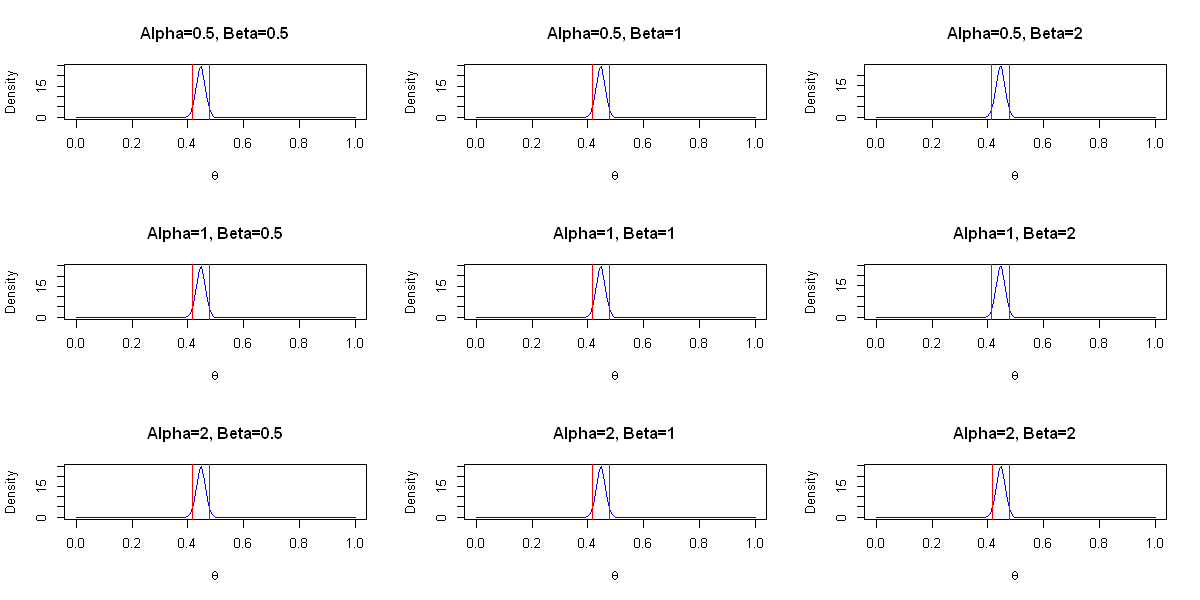

In [37]:
# Plot posterior pdf and credible interval for each combination
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(length(alpha), length(beta)))
for (i in 1:length(alpha)) {
  for (j in 1:length(beta)) {
    posterior_density <- dbeta(theta, alpha[i] + x, beta[j] + n - x)
    credible_interval <- results[paste0("Alpha=", alpha[i]), paste0("Beta=", beta[j]), ]
    plot(theta, posterior_density, type = "l", col = "blue", ylim = c(0, max(posterior_density)), main = paste0("Alpha=", alpha[i], ", Beta=", beta[j]), xlab = expression(theta), ylab = "Density")
    abline(v = credible_interval, col = "red")
  }
}
par(mfrow = c(1, 1))  # Reset plotting parameters

In [41]:
# Print MAP and posterior expectation estimators for each combination
cat("MAP and Posterior Expectation Estimators:\n")
for (i in 1:length(alpha)) {
  for (j in 1:length(beta)) {
    posterior_stats <- compute_posterior_stats(alpha[i], beta[j], x, n)
    cat("Alpha =", alpha[i], ", Beta =", beta[j], ":\n")
    cat("  MAP:", posterior_stats$mode, "\n")
    cat("  Posterior Expectation:", posterior_stats$mean, "\n\n")
  }
}

MAP and Posterior Expectation Estimators:
Alpha = 0.5 , Beta = 0.5 :
  MAP: 0.4458631 
  Posterior Expectation: 0.4459735 

Alpha = 0.5 , Beta = 1 :
  MAP: 0.4456355 
  Posterior Expectation: 0.4457463 

Alpha = 0.5 , Beta = 2 :
  MAP: 0.445181 
  Posterior Expectation: 0.4452926 

Alpha = 1 , Beta = 0.5 :
  MAP: 0.446146 
  Posterior Expectation: 0.4462557 

Alpha = 1 , Beta = 1 :
  MAP: 0.4459184 
  Posterior Expectation: 0.4460285 

Alpha = 1 , Beta = 2 :
  MAP: 0.4454638 
  Posterior Expectation: 0.4455748 

Alpha = 2 , Beta = 0.5 :
  MAP: 0.4467109 
  Posterior Expectation: 0.4468193 

Alpha = 2 , Beta = 1 :
  MAP: 0.4464832 
  Posterior Expectation: 0.4465921 

Alpha = 2 , Beta = 2 :
  MAP: 0.4460285 
  Posterior Expectation: 0.4461382 



In [61]:
# Function to compute the expectation and variance of the piecewise linear nonconjugate prior
expectation_variance <- function(m, c, a, b) {
  E_h <- a + b * m / 2
  Var_h <- (b^2 / 12) * (c^2 + 4 * m * (1 - m))
  return(list(expectation = E_h, variance = Var_h))
}

# Given parameters for the piecewise linear nonconjugate prior
m <- 0.485
c <- 0.100
a <- 0.5
b <- 5.0

# Compute expectation and variance
prior_stats <- expectation_variance(m, c, a, b)
prior_stats


$expectation
[1] 1.7125

$variance
[1] 2.102292

We will now follow a similar aproached as before fo the piecewise linear nonconjugate prior and compare the results.

In [46]:
# Define the piecewise linear nonconjugate prior function as in the given notebook
m<-0.485
c<-0.100
p.tails<-0.4  
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

In [57]:
# Function to compute the posterior statistics using the piecewise linear nonconjugate prior
compute_posterior_stats_nonconjugate <- function(t, x, n) {
  # Compute posterior mean
  posterior_mean <- sum(t * h(t) * dbinom(x, n, t)) / sum(h(t) * dbinom(x, n, t))
  
  # Compute posterior mode (MAP)
  posterior_density <- h(t) * dbinom(x, n, t)
  posterior_mode <- t[which.max(posterior_density)]
  
  # Compute cumulative posterior density
  cum_posterior_density <- cumsum(posterior_density)
  
  # Compute lower bound of 95% credible interval
  lower_index <- which.max(cum_posterior_density >= 0.025)
  lower_bound <- ifelse(length(lower_index) > 0, t[lower_index[1]], 0)
  
  # Compute upper bound of 95% credible interval
  upper_index <- which.max(cum_posterior_density >= 0.975)
  upper_bound <- ifelse(length(upper_index) > 0, t[upper_index[1]], 1)
  
  credible_interval <- c(lower_bound, upper_bound)
  
  return(list(mean = posterior_mean, mode = posterior_mode, credible_interval = credible_interval))
}



In [59]:
# Given data
n <- 980
x <- 437
N <- 1000 # number of grid intervals
t <- seq(0, 1, length = N)
t <- t[-N]  # remove last point (equal to 1: we want N intervals)

# Compute posterior statistics using the piecewise linear nonconjugate prior
posterior_stats_nonconjugate <- compute_posterior_stats_nonconjugate(t, x, n)

# Print posterior statistics
cat("Piecewise Linear Nonconjugate Prior:\n")
cat("  MAP:", posterior_stats_nonconjugate$mode, "\n")
cat("  Posterior Expectation:", posterior_stats_nonconjugate$mean, "\n")
cat("  95% Credible Interval:", posterior_stats_nonconjugate$credible_interval[1], "-", posterior_stats_nonconjugate$credible_interval[2], "\n")


Piecewise Linear Nonconjugate Prior:
  MAP: 0.4494494 
  Posterior Expectation: 0.4495194 
  95% Credible Interval: 0.4124124 - 0.4404404 


There is somithing wrong here I think in the results

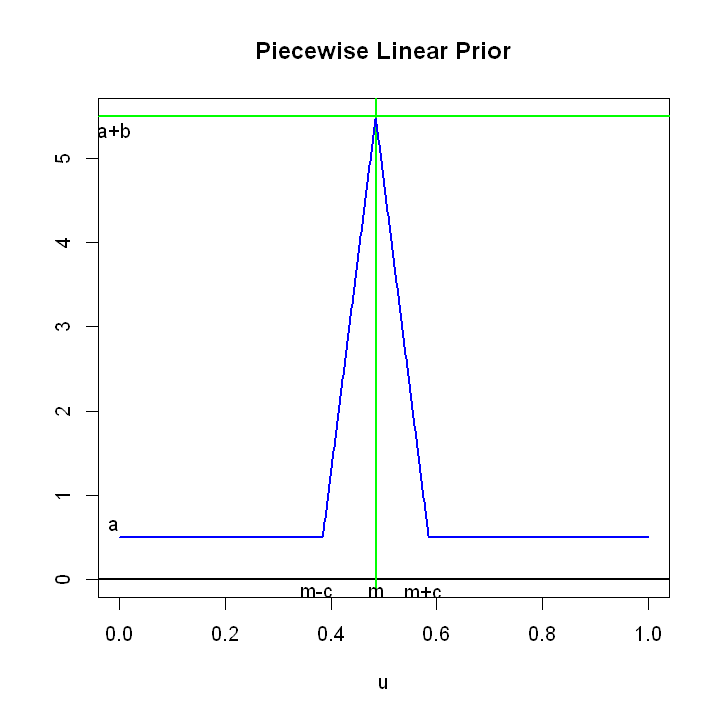

In [60]:
# Create a sequence of points for plotting
u <- seq(0, 1, length = N)

# Plot the piecewise linear prior
plot(u, h(u), type = "l", lwd = 2, col = "blue", xlim = c(0, 1), ylim = c(0, 5.5),
     ylab = "", main = "Piecewise Linear Prior")
abline(h = 0, lwd = 2, col = "black")
abline(v = m, lwd = 2, col = "green")
abline(h = a + b, lwd = 2, col = "green")
lines(u, h(u), lwd = 2, col = "blue")
text(-0.01, a + b - 0.15, "a+b")
text(-0.01, a + 0.15, "a")
text(m, -0.15, "m")
text(m - c - 0.01, -0.15, "m-c")
text(m + c - 0.01, -0.15, "m+c")

### Exercise 1.2

### Exercise 1.3

## Exercise 2: Asthma mortality

This exercise pertains to `Poisson.01.pub.ipynb` (lecture 7). Review this notebook as well as the notes concerning the Poisson model and do the following:

 1. Generate a sample from the prior predictive distribution.
 
 2. Generate a sample from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000). 

In both cases plot the simulated pmf and compare it with the theoretical one and estimate the probability of having more than 25 fatalities in the next 10 years (assuming all other conditions remain constant).